**Teorema de aproximación universal (UAT)**

La UAT establece que las redes neuronales feed forward que contienen una sola capa oculta con un número finito de nodos se pueden usar para aproximar cualquier función continua siempre que se cumplan suposiciones bastante leves sobre la forma de la función de activación. Ahora, dado que casi cualquier proceso que podamos imaginar se puede describir mediante alguna función matemática, las redes neuronales pueden, al menos en principio, predecir el resultado de casi todos los procesos.

Hay varias pruebas rigurosas de la universalidad de las redes neuronales artificiales feed-forward que utilizan diferentes funciones de activación. En aras de la brevedad, limitémonos a la función sigmoidea. Los sigmoides tienen forma de “S” e incluyen como casos especiales la función logística, la curva de Gompertz y la curva conopial.

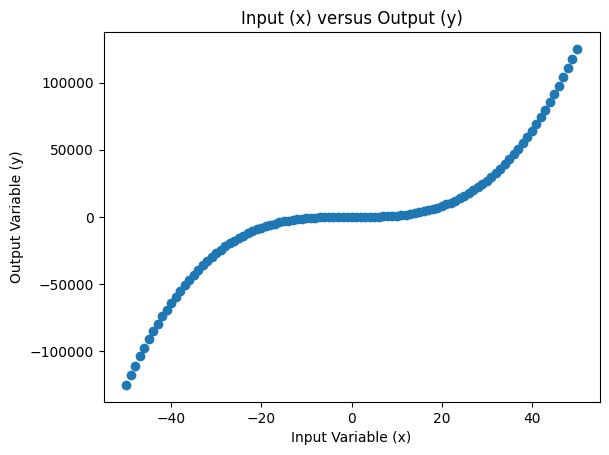

In [ ]:
# example of creating a univariate dataset with a given mapping function
# example of fitting a neural net on x vs x^2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
import numpy as np
# define the input data
x = [i for i in range(-50,51)]
# define the output data
y = [i**3.0 for i in x]
# plot the input versus the output
pyplot.scatter(x,y)
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.show()

Las variables de entrada y salida representan nuestro conjunto de datos.

Luego, podemos pretender olvidar que sabemos cuál es la función de mapeo y usar una red neuronal para volver a aprender o redescubrir la función de mapeo.

**Aproximación de una función simple:**

Podemos ajustar un modelo de red neuronal en ejemplos de entradas y salidas y ver si el modelo puede aprender la función de mapeo.

Esta es una función de mapeo muy simple, por lo que esperaríamos que una red neuronal pequeña pudiera aprenderla rápidamente.

Definiremos la red usando la biblioteca de aprendizaje profundo de Keras y usaremos algunas herramientas de preparación de datos de la biblioteca scikit-learn.

Primero, definamos el conjunto de datos.

In [ ]:
# define the dataset
x = np.asarray([i for i in range(-50,51)])
y = np.asarray([i**5.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())
print(x.shape)
print(y.shape)

-50 50 -312500000.0 312500000.0
(101,)
(101,)


A continuación, podemos remodelar los datos para que las variables de entrada y salida sean columnas con una observación por fila, como se espera cuando se usan modelos de aprendizaje supervisado.

In [ ]:
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
print(x.shape)
print(y.shape)

(101, 1)
(101, 1)


A continuación, necesitaremos escalar las entradas y las salidas.

Las entradas tendrán un rango entre -50 y 50, mientras que las salidas tendrán un rango entre -50^3 (125000) y 0^3 (0). Los valores de entrada y salida grandes pueden hacer que las redes neuronales de entrenamiento sean inestables, por lo tanto, es una buena idea escalar los datos primero.

Podemos usar MinMaxScaler para normalizar por separado los valores de entrada y los valores de salida a valores en el rango entre 0 y 1.

In [ ]:
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


Ahora podemos definir un modelo de red neuronal.

Con algo de prueba y error, elegimos un modelo con dos capas ocultas y 10 nodos en cada capa. Debe experimentar con otras configuraciones para ver si puede hacerlo mejor.

In [ ]:
# design the neural network model
model = Sequential()
#Capas ocultas
model.add(Dense(40, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(140, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(140, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
#Capa de salida
model.add(Dense(1))

Ajustaremos el modelo usando una pérdida cuadrática media y usaremos la versión eficiente de Adam del descenso de gradiente estocástico para optimizar el modelo.

Esto significa que el modelo buscará minimizar el error cuadrático medio entre las predicciones hechas y los valores de salida esperados (y) mientras intenta aproximar la función de mapeo.

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 40)                80        
                                                                 
 dense_37 (Dense)            (None, 140)               5740      
                                                                 
 dense_38 (Dense)            (None, 40)                5640      
                                                                 
 dense_39 (Dense)            (None, 140)               5740      
                                                                 
 dense_40 (Dense)            (None, 40)                5640      
                                                                 
 dense_41 (Dense)            (None, 1)                 41        
                                                                 
Total params: 22881 (89.38 KB)
Trainable params: 22881

In [ ]:
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')

No tenemos muchos datos (por ejemplo, alrededor de 100 filas), por lo que ajustaremos el modelo para 500 épocas y usaremos un tamaño de lote pequeño de 10.

Estos valores se encontraron después de algo de prueba y error; probar diferentes valores y observar si se puede mejorar.

In [ ]:
# fit the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10, verbose='auto')

Epoch 1/500
11/11 [==============================] - 2s 4ms/step - loss: 0.2298
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0244
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0212
Epoch 4/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0141
Epoch 6/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0088
Epoch 7/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 8/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 9/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 10/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 11/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 12/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 13/500
11/11 [=================

Una vez ajustado, podemos evaluar el modelo.

Haremos una predicción para cada ejemplo en el conjunto de datos y calcularemos el error. Una aproximación perfecta sería 0.0. En general, esto no es posible debido al ruido en las observaciones, los datos incompletos y la complejidad de la función subyacente desconocida.

En este caso, es posible porque tenemos todas las observaciones, no hay ruido en los datos y la función subyacente no es compleja.

Primero, podemos hacer la predicción.

In [ ]:
# make predictions for the input data
yhat = model.predict(x)

4/4 [==============================] - 0s 3ms/step


Luego debemos invertir la escala que realizamos.

Esto es para que el error se informe en las unidades originales de la variable de destino.

In [ ]:
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

Luego podemos calcular e informar el error de predicción en las unidades originales de la variable de destino.

In [ ]:
# report model error
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))

MSE: 387033525413584.188


Finalmente, podemos crear un gráfico de dispersión del mapeo real de entradas a salidas y compararlo con el mapeo de entradas a las salidas previstas y ver cómo se ve espacialmente la aproximación de la función de mapeo.

Esto es útil para desarrollar la intuición detrás de lo que están aprendiendo las redes neuronales.

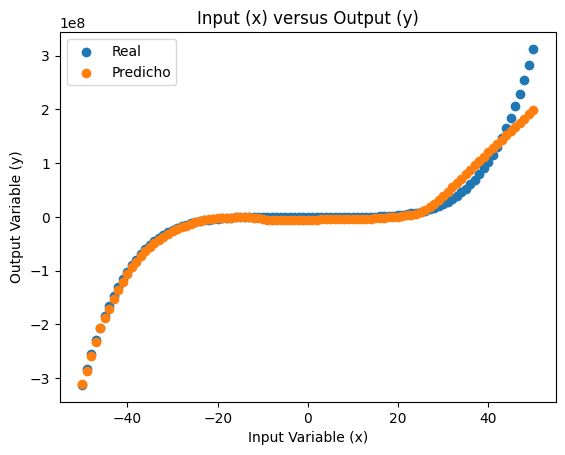

In [ ]:
# plot x vs y
pyplot.scatter(x_plot,y_plot, label='Real')
# plot x vs yhat
pyplot.scatter(x_plot,yhat_plot, label='Predicho')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()